# Step 1 | Import Libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Step 2 ~ Read Dataset

In [2]:
df = pd.read_csv('crop_yield.csv')

# Step 3 ~ Dataset Overview

In [3]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
df.shape

(19689, 10)

In [5]:
df.drop('Yield',axis=1,inplace=True)

In [6]:
df.shape

(19689, 9)

## Step 3.1 - Dataset Basic Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.4+ MB


## Step 3.2 - Summary Statistics for Numerical Variables

In [8]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07


# Step 4 ~ Data Preprocessing

## Step 4.1 - Check Duplicated

In [9]:
df.duplicated().sum()

0

## Step 4.2 - Check Missing Values

In [10]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
dtype: int64

## Step 4.3 - Check Outliers

In [11]:
# Q1 = df['Area'].quantile(0.25)
# Q3 = df['Area'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers1 = df[(df['Area'] < lower_bound) | (df['Area'] > upper_bound)]
# outliers1.shape

In [12]:
# Q1 = df['Area'].quantile(0.25)
# Q3 = df['Area'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers1 = df[(df['Area'] < lower_bound) | (df['Area'] > upper_bound)]
# outliers1.shape

In [13]:
# Q1 = df['Annual_Rainfall'].quantile(0.25)
# Q3 = df['Annual_Rainfall'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers2 = df[ (df['Annual_Rainfall'] < lower_bound) | (df['Annual_Rainfall'] > upper_bound) ]
# outliers2.shape

In [14]:
# Q1 = df['Fertilizer'].quantile(0.25)
# Q3 = df['Fertilizer'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers3 = df[ (df['Fertilizer'] < lower_bound) | (df['Fertilizer'] > upper_bound) ]
# outliers3.shape

In [15]:
# Q1 = df['Pesticide'].quantile(0.25)
# Q3 = df['Pesticide'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers4 = df[ (df['Pesticide'] < lower_bound) | (df['Pesticide'] > upper_bound) ]
# outliers4.shape

In [16]:
# # Concatenate the DataFrames
# all_data = pd.concat([outliers1, outliers2, outliers3,outliers4], axis=0)

# # Count the occurrences of each row
# row_counts = all_data.groupby(list(all_data.columns)).size().reset_index(name='count')

# # Filter to find rows that appear exactly 3 times (once in each DataFrame)
# common_rows = row_counts[row_counts['count'] == 4]

# # The number of common rows
# num_common_rows = len(common_rows)
# print(f"Number of common rows in all four outliers DataFrames: {num_common_rows}")


# Step 5 ~ EDA

## Step 5.1 - Data Visualization of Categorical Features

In [57]:
len(df['Crop'].unique())

55

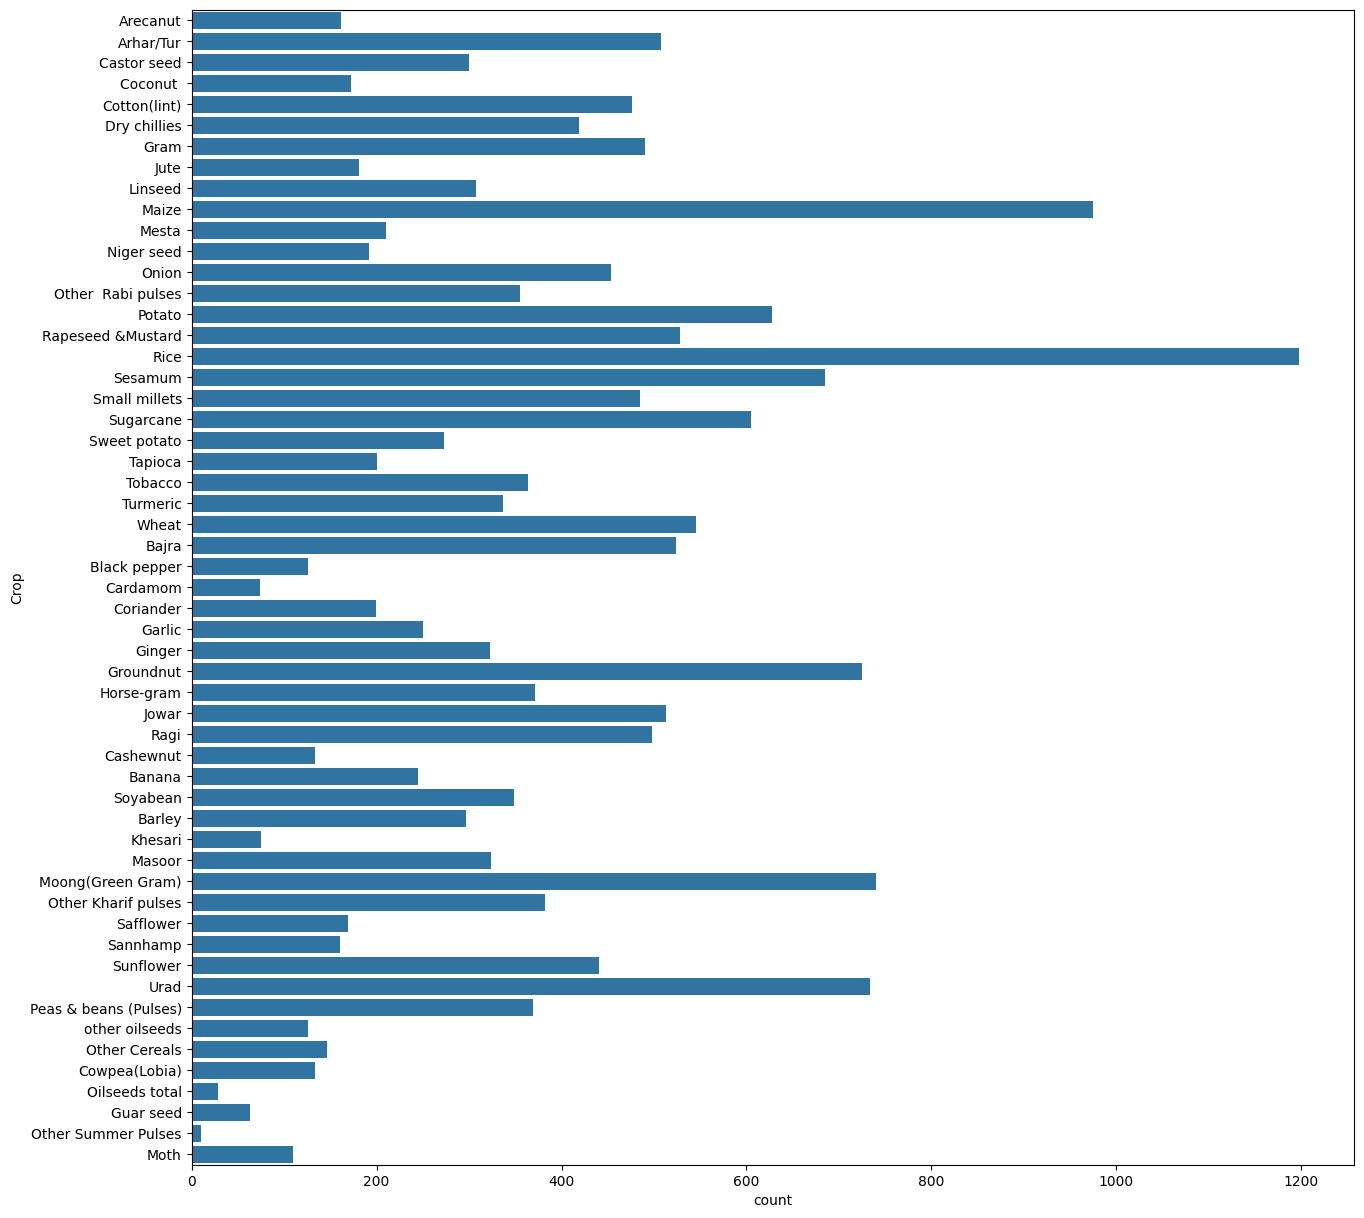

In [18]:
plt.figure(figsize=(15,15))
sns.countplot(df['Crop'])
plt.show()

In [19]:
df['Crop_Year'].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [20]:
# plt.figure(figsize=(20,15))
# sns.barplot(df['Crop_Year'])
# plt.show()

In [21]:
df['Season'].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [22]:
# removing spaces prresent in season column
df['Season'] = df['Season'].str.strip()

In [58]:
df['Season'].unique()

array(['Whole Year', 'Kharif', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

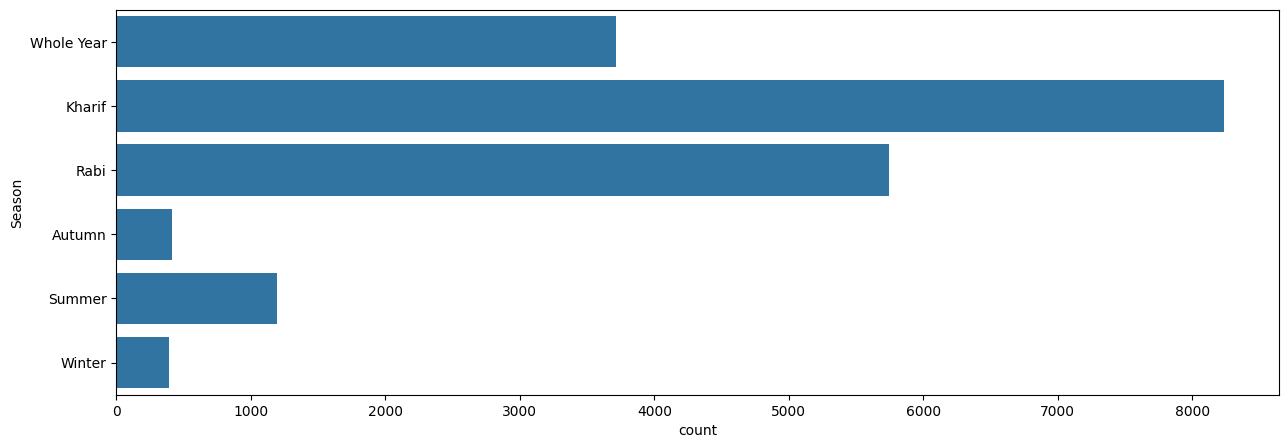

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(df['Season'])
plt.show()

In [60]:
len(df['State'].unique())

30

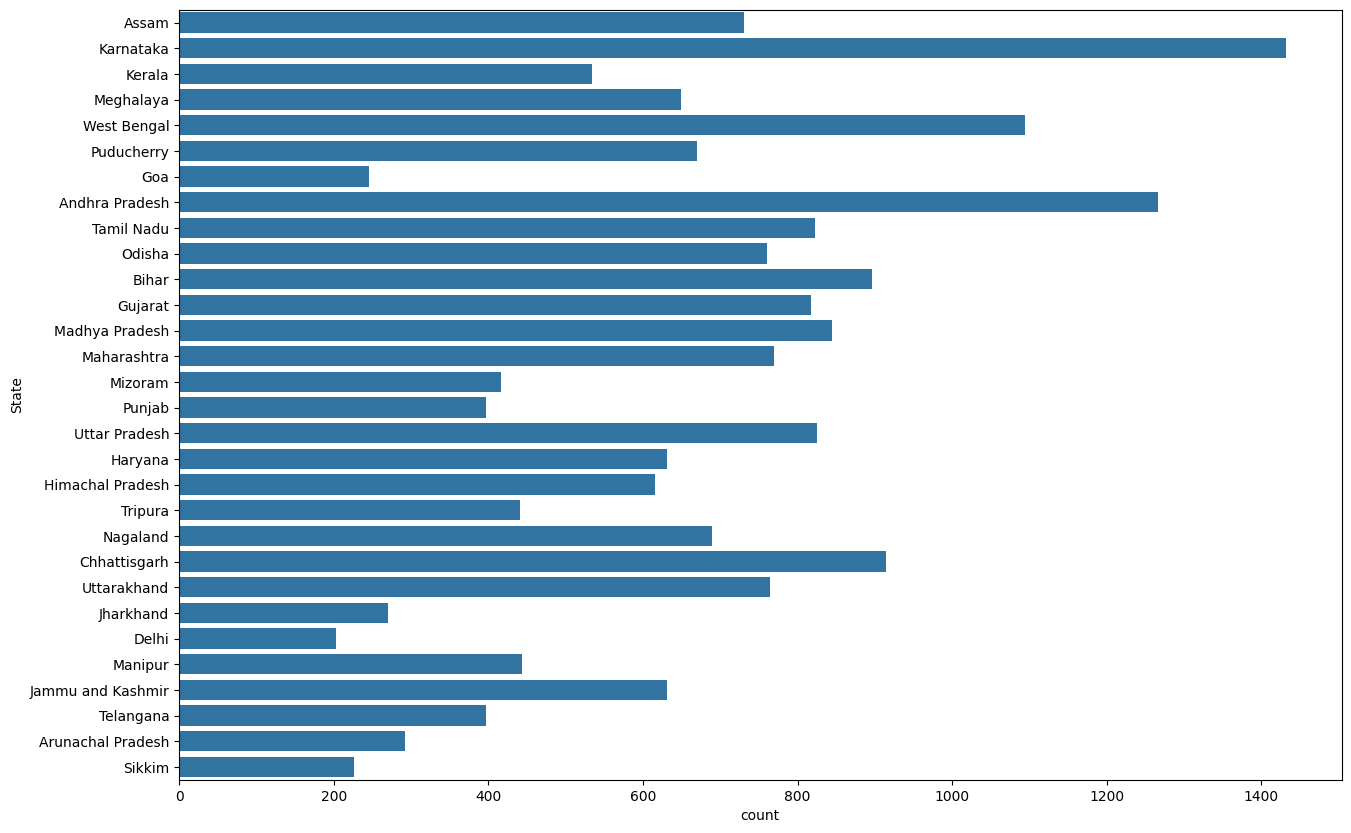

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(df['State'])
plt.show()

## Step 5.2 - Data Visualization of Numerical Features

## year wise analysis of agricultural production

In [26]:
# df_year = df[df['Crop_Year'] != 2020] # As the data of 2020 is incomplete

In [27]:
year_yield = df.groupby('Crop_Year').sum()
year_yield

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
Crop_Year,,,,,,,,
1997,ArecanutArhar/TurCastor seedCoconut Cotton(lin...,Whole YearKharifKharifWhole YearKharifWhole Ye...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.660686e+08,6087009873,6.542691e+05,1.580475e+10,5.148126e+07
1998,ArecanutBajraBlack pepperCorianderCotton(lint)...,KharifKharifKharifKharifSummerKharifRabiKharif...,PuducherryPuducherryPuducherryPuducherryPuduch...,1.501238e+08,7868086697,1.138474e+06,1.483223e+10,4.353590e+07
1999,ArecanutArhar/TurBananaCastor seedCoconut Cott...,Whole YearKharifWhole YearKharifWhole YearKhar...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.470574e+08,8550025528,1.033857e+06,1.560720e+10,3.970550e+07
2000,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole YearKharifRabiKharifRabiWhole YearWhole ...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.475277e+08,9562470060,1.119624e+06,1.448280e+10,3.835721e+07
2001,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole YearKharifRabiKharifRabiWhole YearWhole ...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.456943e+08,9314563490,1.055077e+06,1.487976e+10,3.788053e+07
2002,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole YearKharifRabiKharifRabiWhole YearWhole ...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.427858e+08,12409349456,1.040622e+06,1.351753e+10,3.569644e+07
2003,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole YearKharifRabiKharifRabiWhole YearWhole ...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.496968e+08,12313711969,1.135610e+06,1.481699e+10,3.592724e+07
2004,ArecanutArhar/TurBajraBajraBajraBananaBlack pe...,Whole YearKharifKharifRabiSummerWhole YearWhol...,KarnatakaKarnatakaKarnatakaKarnatakaKarnatakaK...,1.480245e+08,13817065380,1.141189e+06,1.603697e+10,3.108514e+07
2005,ArecanutArhar/TurBajraBajraBananaCashewnutCast...,Whole YearKharifKharifRabiWhole YearWhole Year...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.479183e+08,14951210018,1.185828e+06,1.773836e+10,3.106285e+07


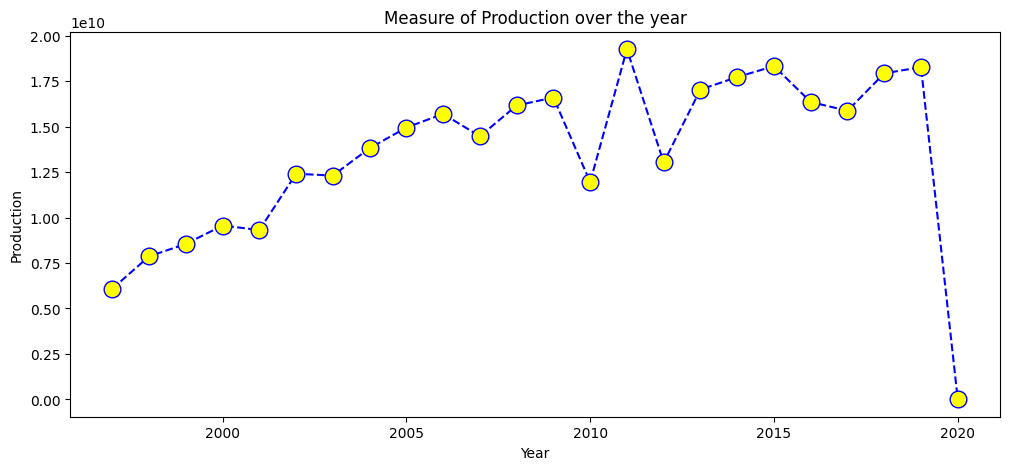

In [28]:
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Production'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Measure of Production over the year')
plt.show()

/var/folders/96/cdbcz5qx12q_n3_3_vcc7l3h0000gn/T/ipykernel_35087/2725484457.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Area'])


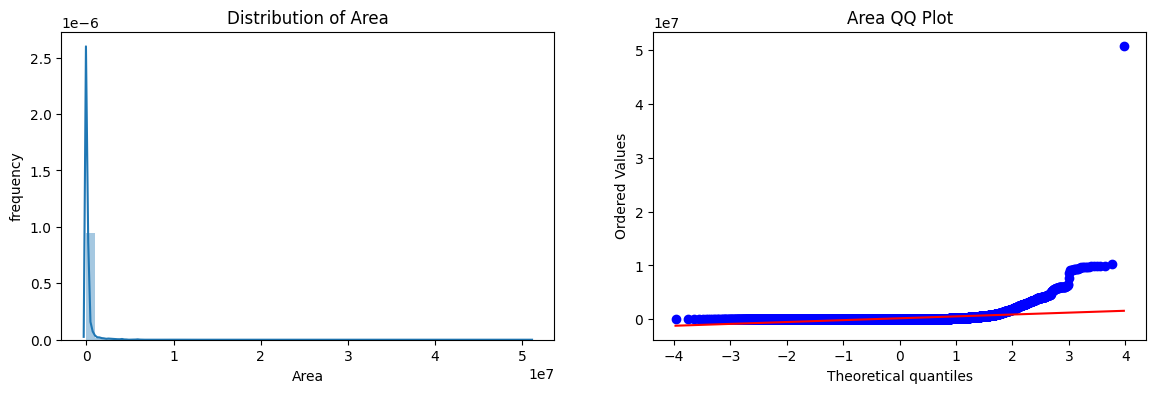

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Area'])
# plt.hist(df['Area'],bins = 50,edgecolor='black')
plt.xlabel('Area')
plt.ylabel('frequency')
plt.title('Distribution of Area')


plt.subplot(122)
stats.probplot(df['Area'],dist="norm",plot=plt)
plt.title('Area QQ Plot')
plt.show()

/var/folders/96/cdbcz5qx12q_n3_3_vcc7l3h0000gn/T/ipykernel_35087/2104704729.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual_Rainfall'])


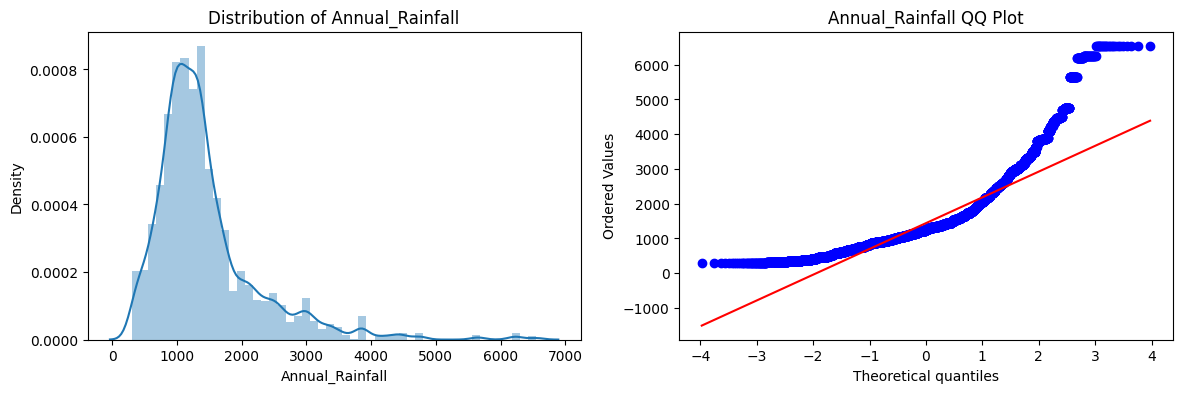

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Annual_Rainfall'])
plt.title('Distribution of Annual_Rainfall')

plt.subplot(122)
stats.probplot(df['Annual_Rainfall'],dist='norm',plot=plt)
plt.title('Annual_Rainfall QQ Plot')

plt.show()

/var/folders/96/cdbcz5qx12q_n3_3_vcc7l3h0000gn/T/ipykernel_35087/4039815687.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fertilizer'])


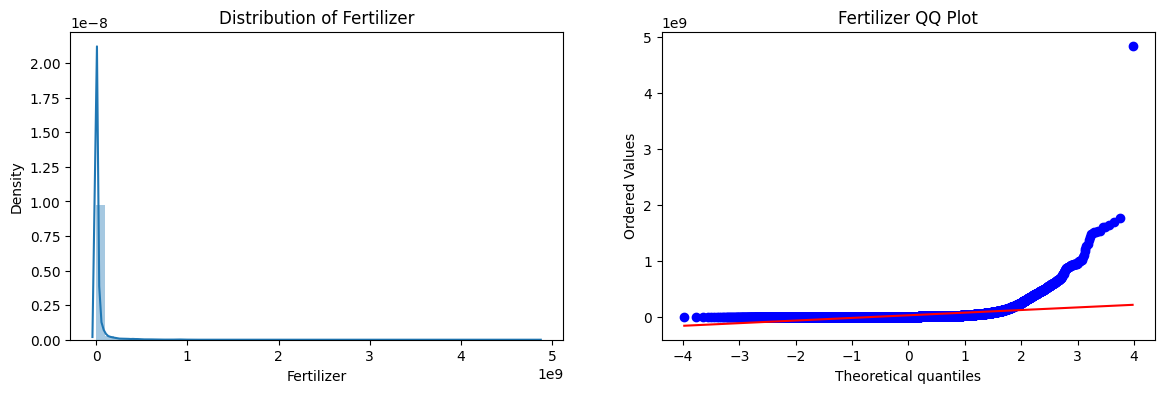

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fertilizer'])
plt.title('Distribution of Fertilizer')

plt.subplot(122)
stats.probplot(df['Fertilizer'],dist='norm',plot=plt)
plt.title('Fertilizer QQ Plot')

plt.show()

/var/folders/96/cdbcz5qx12q_n3_3_vcc7l3h0000gn/T/ipykernel_35087/3282057876.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pesticide'])


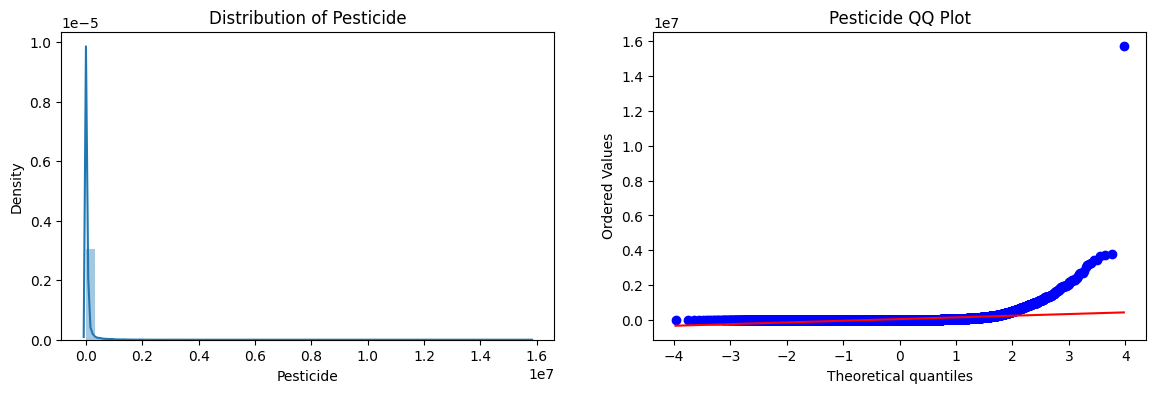

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Pesticide'])
plt.title('Distribution of Pesticide')

plt.subplot(122)
stats.probplot(df['Pesticide'],dist='norm',plot=plt)
plt.title('Pesticide QQ Plot')

plt.show()

# Step 6 ~ Feature Selection

In [33]:
# Categorize crop_year
# bins = [1990, 1995, 2000, 2005, 2010, 2015, 2020]  # Example bins, adjust based on your data range
# labels = ['90s', '95s', '2000s', '2005s', '2010s', '2015s']
# df['Year_Interval'] = pd.cut(df['Crop_Year'], bins=bins, labels=labels)

In [34]:
# df.drop(columns='Crop_Year',inplace=True)

In [35]:
X = df.drop('Production',axis=1)
y = df['Production']

In [36]:
X

,Crop,Crop_Year,Season,State,Area,Annual_Rainfall,Fertilizer,Pesticide
0,Arecanut,1997,Whole Year,Assam,73814.0,2051.4,7024878.38,22882.34
1,Arhar/Tur,1997,Kharif,Assam,6637.0,2051.4,631643.29,2057.47
2,Castor seed,1997,Kharif,Assam,796.0,2051.4,75755.32,246.76
3,Coconut,1997,Whole Year,Assam,19656.0,2051.4,1870661.52,6093.36
4,Cotton(lint),1997,Kharif,Assam,1739.0,2051.4,165500.63,539.09
...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,1498.0,395200.00,1160.00
19685,Wheat,1998,Rabi,Nagaland,1000.0,1498.0,98800.00,290.00
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,1356.2,29586735.11,96373.73
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,1356.2,26242746.82,85481.26


In [37]:
y

0            56708
1             4685
2               22
3        126905000
4              794
           ...    
19684         2000
19685         3000
19686       440900
19687         5488
19688       392160
Name: Production, Length: 19689, dtype: int64

# Step 7 ~ Model Building And Evaluation

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.head(2)

,Crop,Crop_Year,Season,State,Area,Annual_Rainfall,Fertilizer,Pesticide
19466,Groundnut,2011,Kharif,Goa,357.0,3340.395455,59804.64,117.81
17802,Barley,2007,Kharif,Delhi,75.0,677.500000,10005.00,12.00


In [40]:
y_train

19466      1022
17802       196
7014         84
14078     24800
8121     379455
          ...  
11284     61514
11964     84356
5390     153558
860       16137
15795       900
Name: Production, Length: 15751, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler,RobustScaler,PowerTransformer,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [42]:
# for Categorize crop_year ....

# preprocessor = ColumnTransformer(
#     transformers = [
#         ('yeo_johnson_transform',PowerTransformer(method='yeo-johnson'),[3,4,5,6]),
#         ('robust_scaler',RobustScaler(),[3,4,5,6]),
#         ('season_order',OrdinalEncoder(categories=[['Winter','Summer','Autumn','Rabi','Kharif','Whole Year']]),[1]),
#         ('Year_order',OrdinalEncoder(categories=[['90s', '95s', '2000s', '2005s', '2010s', '2015s']]), [7]),
#         ('OHE',OneHotEncoder(drop='first',handle_unknown='ignore'),[0,2])
#     ],
#     remainder = 'passthrough'
# )

In [43]:
preprocessor = ColumnTransformer(
    transformers = [
        ('yeo_johnson_transform',PowerTransformer(method='yeo-johnson'),[1,4,5,6,7]),
        ('robust_scaler',RobustScaler(),[1,4,5,6,7]),
        ('season_order',OrdinalEncoder(categories=[['Winter','Summer','Autumn','Rabi','Kharif','Whole Year']]),[2]),
        ('OHE',OneHotEncoder(drop='first',handle_unknown='ignore'),[0,3])
    ],
    remainder = 'passthrough'
)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest,f_classif

In [45]:
# Feature selection using KBest method to reduce curse of dimensionality
# kbest = SelectKBest(score_func=f_classif,k=30)

In [46]:
# After hyperparameter tuning best parameters are selected to reduce runtime and increse performance of model
rf = RandomForestRegressor(max_features=0.75,max_samples=0.75,n_estimators=400,n_jobs=-1)

In [47]:
pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    # ('kbest',kbest),
    ('RF_regressor',rf)
])

In [48]:
pipe.fit(X_train,y_train)

/Users/debabratasamanta/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo_johnson_transform',
                                                  PowerTransformer(),
                                                  [1, 4, 5, 6, 7]),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  [1, 4, 5, 6, 7]),
                                                 ('season_order',
                                                  OrdinalEncoder(categories=[['Winter',
                                                                              'Summer',
                                                                              'Autumn',
                                                                              'Rabi',
                                                                              'Kharif',
                                                                              'Whole '
                                                                              'Year']]),
                                                  [2]),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 3])])),
                ('RF_regressor',
                 RandomForestRegressor(max_features=0.75, max_samples=0.75,
                                       n_estimators=400, n_jobs=-1))])

In [49]:
y_pred = pipe.predict(X_test)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9897227193679369

In [51]:
y_pred1 = pipe.predict(X_train)
r2_score(y_train,y_pred1)

0.9958999931317842

In [52]:
# input = np.array(['Groundnut',2011,'Kharif','Goa',357.0,3340.395455,59804.64,117.81]).reshape(1,-1)
# pipe.predict(input)

# Step 7 ~ Predictive System

In [53]:
# for Categorize crop_year ....

# def categorize_year(year, bins, labels):
#     # Create a temporary DataFrame with the input year
#     temp_df = pd.DataFrame({'Year': [year]})
    
#     # Bin the year based on the predefined bins and labels
#     temp_df['Year_Interval'] = pd.cut(temp_df['Year'], bins=bins, labels=labels)
    
#     # Return the categorized interval (as string)
#     return temp_df['Year_Interval'].iloc[0]


# def yield_prediction(crop,season,state,area,annual_rainfall,fertilizer,pesticide,year_interval):
#     # create an array of the input features
#     features = np.array([crop,season,state,area,annual_rainfall,fertilizer,pesticide,year_interval]).reshape(1,-1)

#     # Make the prediction
#     predicted_yield = pipe.predict(features)

#     return predicted_yield[0]


# crop = 'Groundnut'

# crop_year = 2017
# bins = [1990, 1995, 2000, 2005, 2010, 2015, 2020]
# labels = ['90s', '95s', '2000s', '2005s', '2010s', '2015s']
# year_interval = categorize_year(crop_year, bins, labels)

# season = 'Kharif'
# state = 'Goa'
# area = 35.0
# annual_rainfall = 7996.395455
# fertilizer = 92001.64
# pesticide = 117.81

# result = yield_prediction(crop,season,state,area,annual_rainfall,fertilizer,pesticide,year_interval)
# result

In [54]:
def yield_prediction(crop,crop_year,season,state,area,annual_rainfall,fertilizer,pesticide):
    # create an array of the input features
    features = np.array([crop,crop_year,season,state,area,annual_rainfall,fertilizer,pesticide]).reshape(1,-1)

    # Make the prediction
    predicted_yield = pipe.predict(features)

    return predicted_yield[0]


crop = 'Groundnut'
crop_year = 2010
season = 'Kharif'
state = 'Goa'
area = 35.0
annual_rainfall = 2996.395455
fertilizer = 92001.64
pesticide = 117.81

result = yield_prediction(crop,crop_year,season,state,area,annual_rainfall,fertilizer,pesticide)
result

/Users/debabratasamanta/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/debabratasamanta/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/Users/debabratasamanta/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
/Users/debabratasamanta/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


534.1975

# Step 8 ~ Pickle Files

In [55]:
import pickle
pickle.dump(pipe,open('yield_pipeline.pkl','wb'))